In [71]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [72]:
%matplotlib inline

In [73]:
df = pd.read_csv('ecg.csv')

In [74]:
df = df.dropna()

In [75]:
df = df.drop([0], axis =0)

In [79]:
df = df[1:1000]

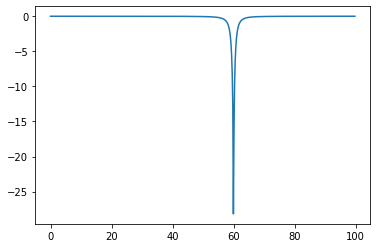

In [84]:
# Create/view notch filter
samp_freq = 200 # Sample frequency (Hz)
notch_freq = 60 #frency to be removed from signal (Hz)
quality_factor = 30 # Quality factor
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
freq, h = signal.freqz(b_notch, a_notch, fs = samp_freq)
plt.figure('filter')
plt.plot( freq, 20*np.log10(abs(h)))

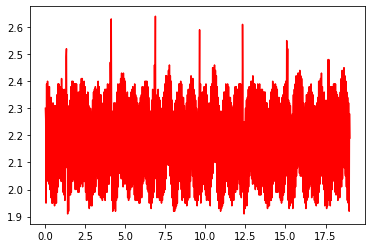

In [85]:
# Create/view signal that is a mixture of two frequencies
f1 = 17
f2 = 60
t = list(df['time'])
y_pure = list(df['volt'])
plt.figure('result')
plt.plot(t, y_pure, color = 'r')

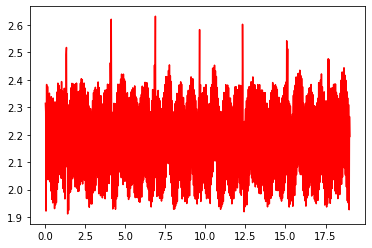

In [86]:
# apply notch filter to signal
y_notched = signal.filtfilt(b_notch, a_notch, y_pure)

# plot notch-filtered version of signal
plt.plot(t, y_notched, color = 'r')